# Introduction to ARIMA Models

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q),

    where,

    - p is the order of the AR term

    - q is the order of the MA term

    - d is the number of differencing required to make the time series stationary


1. AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

2. I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

3. MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

# Types of ARIMA Model

- ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
- SARIMA : Seasonal ARIMA
- SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

# The meaning of p, d and q in ARIMA model

### The meaning of p

- p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.

### The meaning of d

- The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.
- The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.
- The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.

### The meaning of q

- q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

# AR and MA models

### 1. AR model

- An Auto Regressive (AR) model is one where Yt depends only on its own lags.

- That is, Yt is a function of the lags of Yt. It is depicted by the following equation -

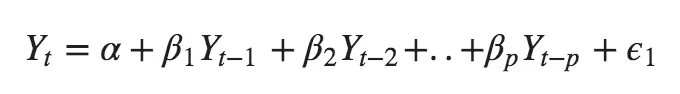

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1

where,

- Yt−1  is the lag1 of the series,

- β1  is the coefficient of lag1 that the model estimates, and

- α  is the intercept term, also estimated by the model.

### 2. MA model

- Likewise a Moving Average (MA) model is one where Yt depends only on the lagged forecast errors. It is depicted by the following equation

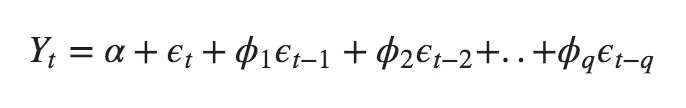

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1

where the error terms are the errors of the autoregressive models of the respective lags.

- The errors Et and E(t-1) are the errors from the following equations :

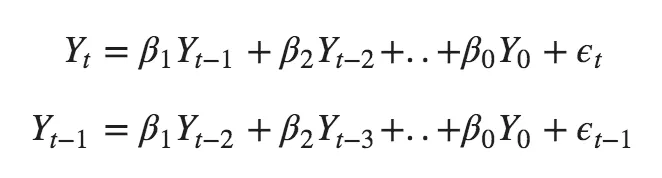

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1

Thus, we have discussed AR and MA Models respectively.


### 3. ARIMA model

- An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms. So the equation of an ARIMA model becomes :

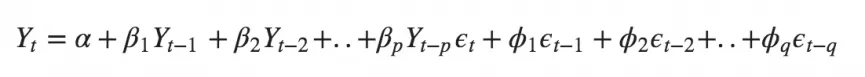

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1

#### ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## How to find the order of differencing (d) in ARIMA model ¶

- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.

- So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

In this study:

 - First, I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
 - The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.
 - So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

# Load Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('C:\\Users\\frank\\OneDrive\\Desktop\\Kaggle\\data\\ARIMA.txt')

df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [4]:
result = adfuller(df['value'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


- Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

In [5]:
result = adfuller(df['value'].diff().dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.495172
p-value: 0.116653


In [6]:
result = adfuller(df['value'].diff().diff().dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.292305
p-value: 0.000000


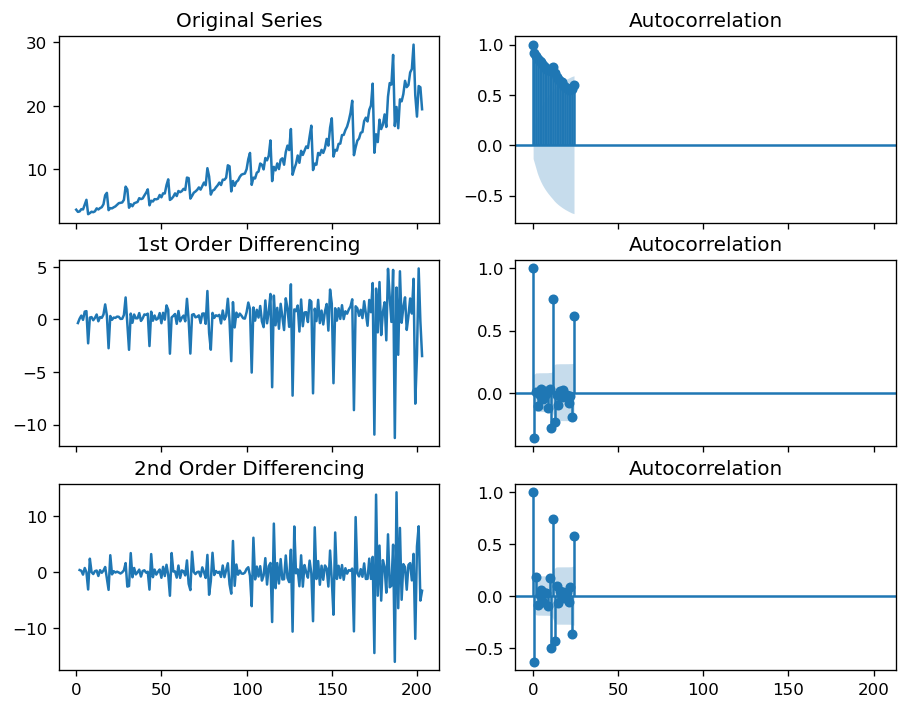

In [7]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['value']); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['value'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['value'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

- The time series reaches stationarity with two orders of differencing. We can select d = 1.

# How to find the order of the AR term (p)

- The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
- Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
- Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.

    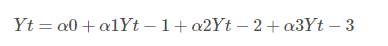

- That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  α3  of Y_t-3 in the above equation.
- Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

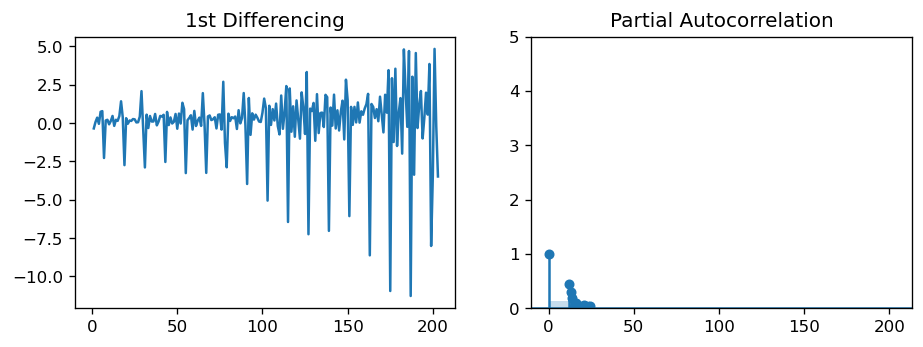

In [8]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['value'].diff().dropna(), ax=axes[1])

plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

# How to find the order of the MA term (q)

- Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.
- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.
- Let’s see the autocorrelation plot of the differenced series.

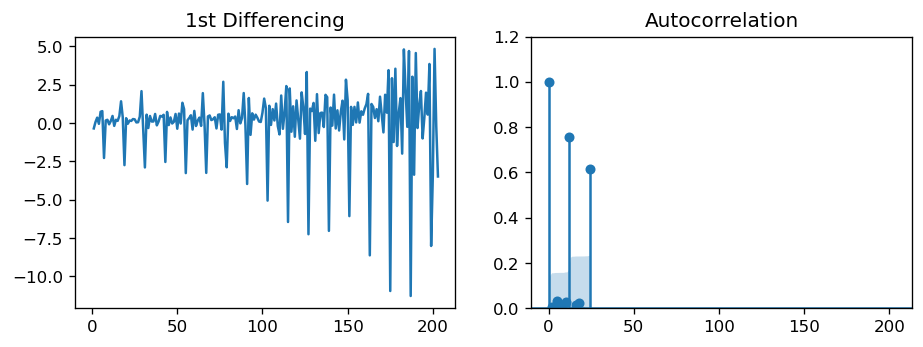

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['value'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

- We can see that couple of lags are well above the significance line. So, we will fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y. q = 2.

# How to handle if a time series is slightly under or over differenced

- It may happen that the time series is slightly under differenced. Differencing it one more time makes it slightly over-differenced.
- If the series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, we will try adding an additional MA term.

# Build the ARIMA Model

In [10]:
model = ARIMA(df['value'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -417.781
Method:                       css-mle   S.D. of innovations              1.889
Date:                Thu, 24 Jun 2021   AIC                            845.561
Time:                        14:09:43   BIC                            862.127
Sample:                             1   HQIC                           852.263
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0964      0.017      5.655      0.000       0.063       0.130
ar.L1.D.value     0.4019      0.173      2.319      0.020       0.062       0.742
ma.L1.D.value    -1.0114      0.178     

- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

- So, we will rebuild the model without the MA2 term.

In [11]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.919
Method:                       css-mle   S.D. of innovations              1.890
Date:                Thu, 24 Jun 2021   AIC                            843.838
Time:                        14:09:44   BIC                            857.091
Sample:                             1   HQIC                           849.200
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0965      0.017      5.650      0.000       0.063       0.130
ar.L1.D.value     0.3140      0.075      4.183      0.000       0.167       0.461
ma.L1.D.value    -0.9164      0.026    -

- The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

- Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

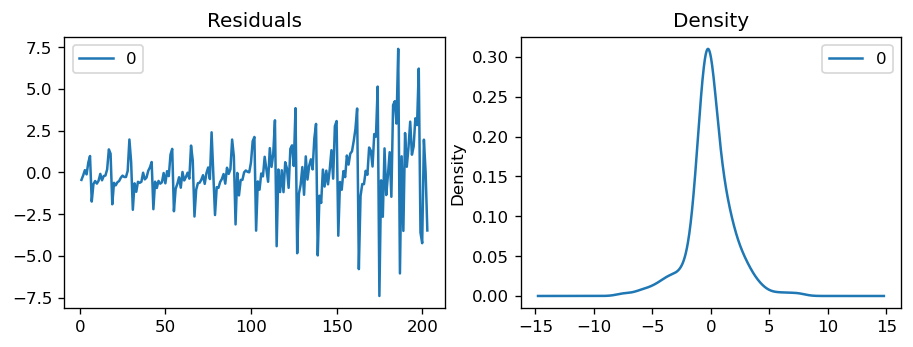

In [12]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

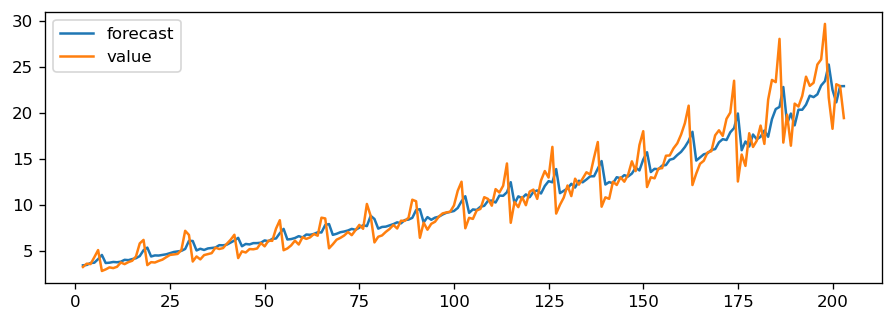

In [13]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

- When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

- So, we seem to have a decent ARIMA model. But, we can’t say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

- So, the real validation we need now is the Out-of-Time cross-validation, discussed next.

# Find the optima ARIMA model using Out-of-Time Cross Valisation

- In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

- To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series.

In [14]:
# Create Training and Test
train = df.value[:85]
test = df.value[85:]

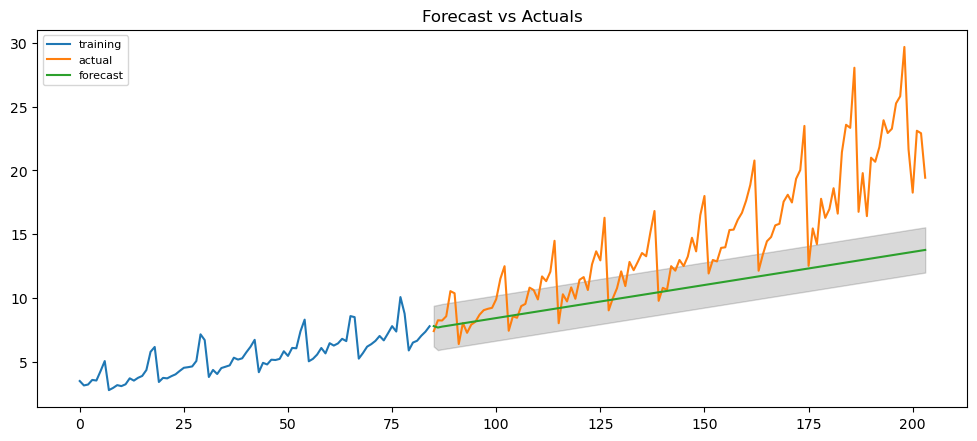

In [15]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(steps = 119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

- But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

- So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

- While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -116.885
Method:                       css-mle   S.D. of innovations              0.956
Date:                Thu, 24 Jun 2021   AIC                            245.771
Time:                        14:09:47   BIC                            260.284
Sample:                             2   HQIC                           251.601
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.346e-05      0.003      0.020      0.984      -0.005       0.005
ar.L1.D2.value    -0.2204      0.110     -2.008      0.045      -0.436      -0.005
ar.L2.D2.value    -0.3436      0.104

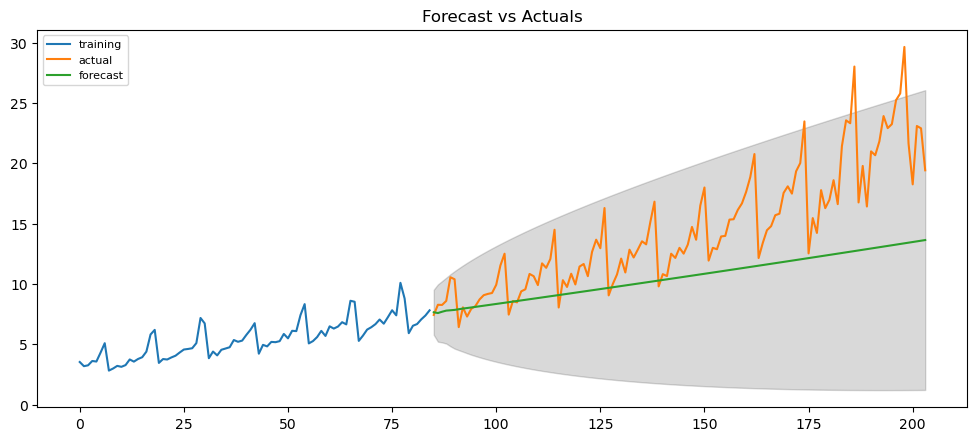

In [16]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy Metrics for Time Series Forecast

The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)

Typically, we will use three accuracy metrices:-

1. MAPE
1. Correlation and
2. Min-Max Error

can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.

In [17]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.23226610420953317,
 'me': -3.868546963314577,
 'mae': 3.9661900603287257,
 'mpe': -0.2193227305391703,
 'rmse': 5.2717867288218825,
 'acf1': 0.689605856979266,
 'corr': 0.8760684471679424,
 'minmax': 0.23149911896138242}

- Around 23.22% MAPE implies the model is about 76.78% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.

- But, we should also know how to automate the best model selection process. So, we will discuss it next.

# Auto Arima Forecasting in Python

- In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

- auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

- We need to install the pmdarima package first.

In [18]:
model = pm.auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # It seems d needs to be adjusted manually
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D= None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=313.702, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=299.022, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=311.705, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=278.946, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=275.547, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=268.396, Time=0.04 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=266.348, Time=0.06 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=264.349, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=266.407, Time=0.03 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 1.51

In [19]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -126.174
Date:                Thu, 24 Jun 2021   AIC                            264.349
Time:                        14:09:50   BIC                            278.862
Sample:                             0   HQIC                           270.179
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9179      0.176     -5.201      0.000      -1.264      -0.572
ar.L2         -0.9673      0.271     -3.572      0.000      -1.498      -0.437
ar.L3         -0.6914      0.259     -2.670      0.0

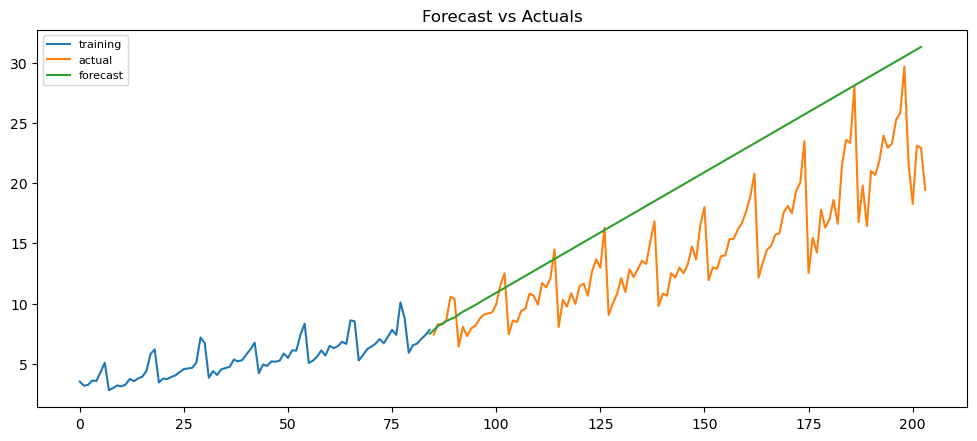

In [20]:
forecasts = model.predict(test.shape[0])

index_fc = np.arange(train.shape[0] - 1, test.shape[0] + train.shape[0] - 1)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(index_fc, forecasts, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

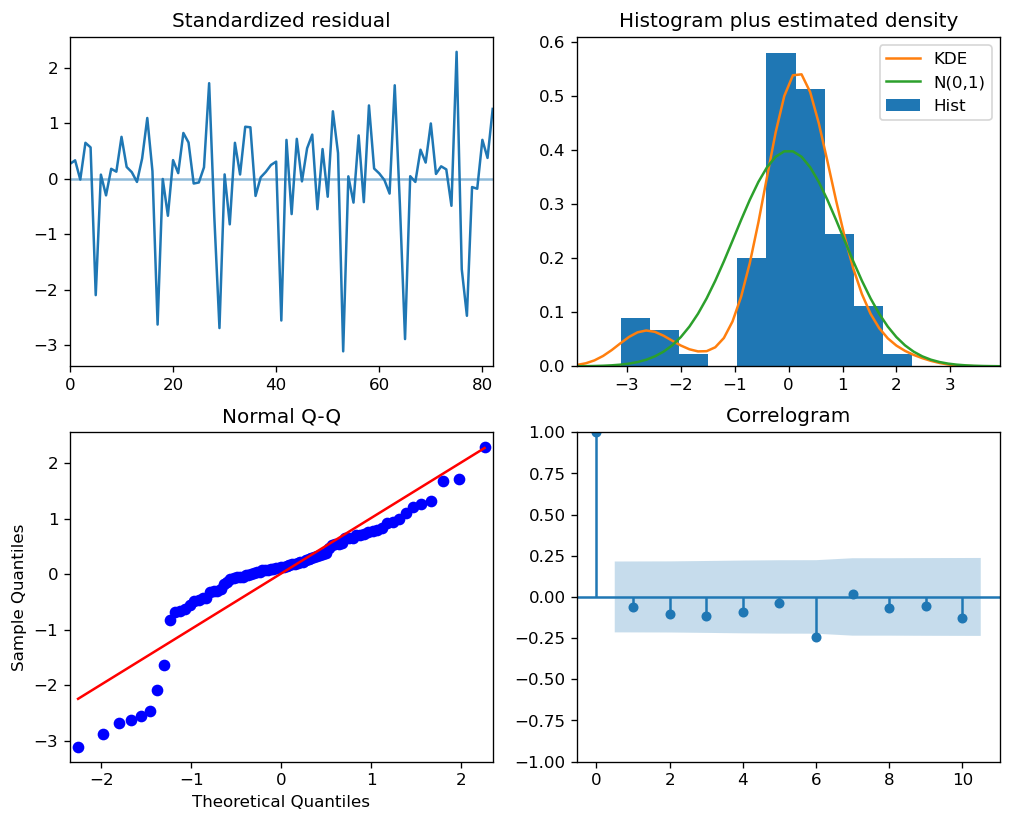

In [21]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

# Interpretation of plots in plot diagnostics

- Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

- Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

- Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

- Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

- Overall, the model seems to be a good fit. So, let's use it to forecast.

In [22]:
model = pm.auto_arima(df['value'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # Manually adjust d
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D= None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=906.891, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=879.586, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=858.886, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=905.140, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=843.838, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=845.350, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=845.561, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=847.152, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=876.959, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=836.293, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=838.121, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=824.666, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=845.723, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=831.738, Time=0.58 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=830.2

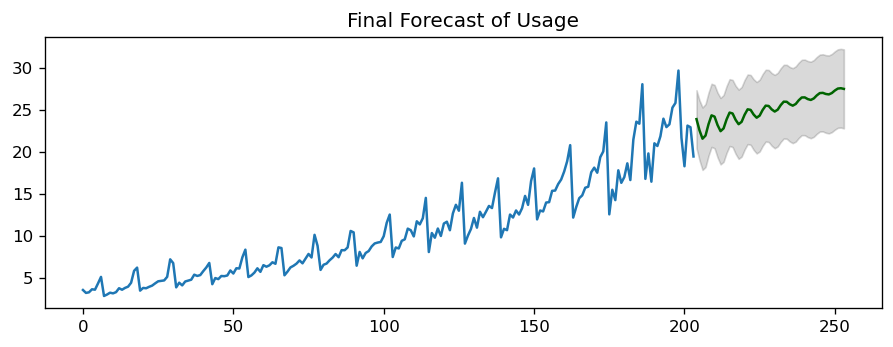

In [23]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

#  SARIMA model in python

- The plain ARIMA model has a problem. It does not support seasonality.
- If the time series has defined seasonality, then we should go for Seasonal ARIMA model (in short SARIMA) which uses seasonal differencing.
- Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, we subtract the value from previous season.
- So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series. If the model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.
- We should set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. We should try to keep only either SAR or SMA terms if the model has seasonal components.
- Now, we will build a SARIMA model on the time series dataset.
- But, first import the dataset

In [24]:
data = pd.read_csv('C:\\Users\\frank\\OneDrive\\Desktop\\Kaggle\\data\\ARIMA.txt', parse_dates=['date'], index_col='date')

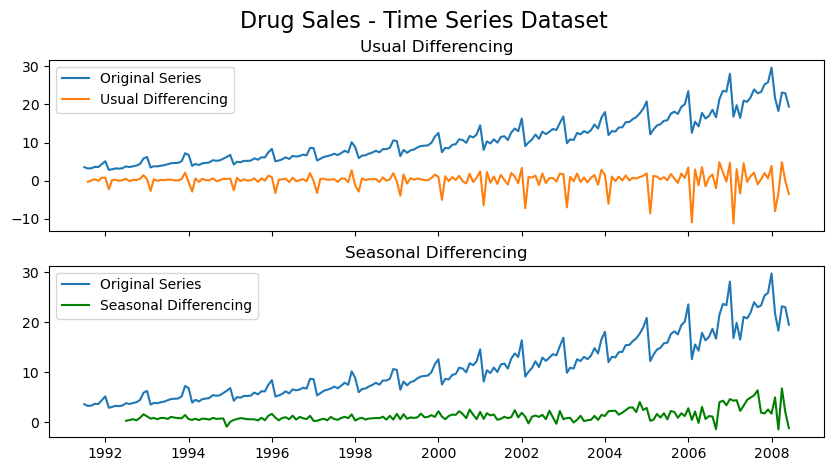

In [25]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(periods = 1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(periods = 12), label='Seasonal Differencing', color='green') # periods = 12 as column data is by month
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- We can see that, the seasonal spikes are intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

- Now, let’s build the SARIMA model using pmdarima‘s auto_arima(). To do so, we need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [26]:
# Create Training and Test
train = data[:int(0.7*len(data))]
test = data[int(0.7*len(data)) - 1:]

In [27]:
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=194.936, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=282.570, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=235.342, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=196.401, Time=0.19 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=196.224, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=196.118, Time=0.40 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=195.808, Time=0.66 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=195.678, Time=0.17 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=197.807, Time=1.49 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=234.052, Time=0.13 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=196.587, Time=0.41 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=196.807, Time=0.41 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=282.313, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=194.834, Time=0.25 sec
 ARIMA(0,1,2)(0,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  142
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -93.417
Date:                              Thu, 24 Jun 2021   AIC                            194.834
Time:                                      14:10:04   BIC                            206.273
Sample:                                           0   HQIC                           199.482
                                              - 142                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0266      0.094    -10.881      0.000      -1.211      -0.842
ma.L2          0.1673      0.090      1.869      0.062      -0.008       0.343
ma.S.L12      -0.2001      0.075     -2.662      0.008      -0.347      -0.053
sigma2         0.2452      0.025      9.744      0.000       0.196       0.295
===================================================================================
Ljung-Box (Q):                       42.97   Jarque-Bera (JB):                 7.61
Prob(Q):                              0.35   Prob(JB):                         0.02
Heteroskedasticity (H):               2.62   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

- The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

- Let’s forecast for the next 24 months.

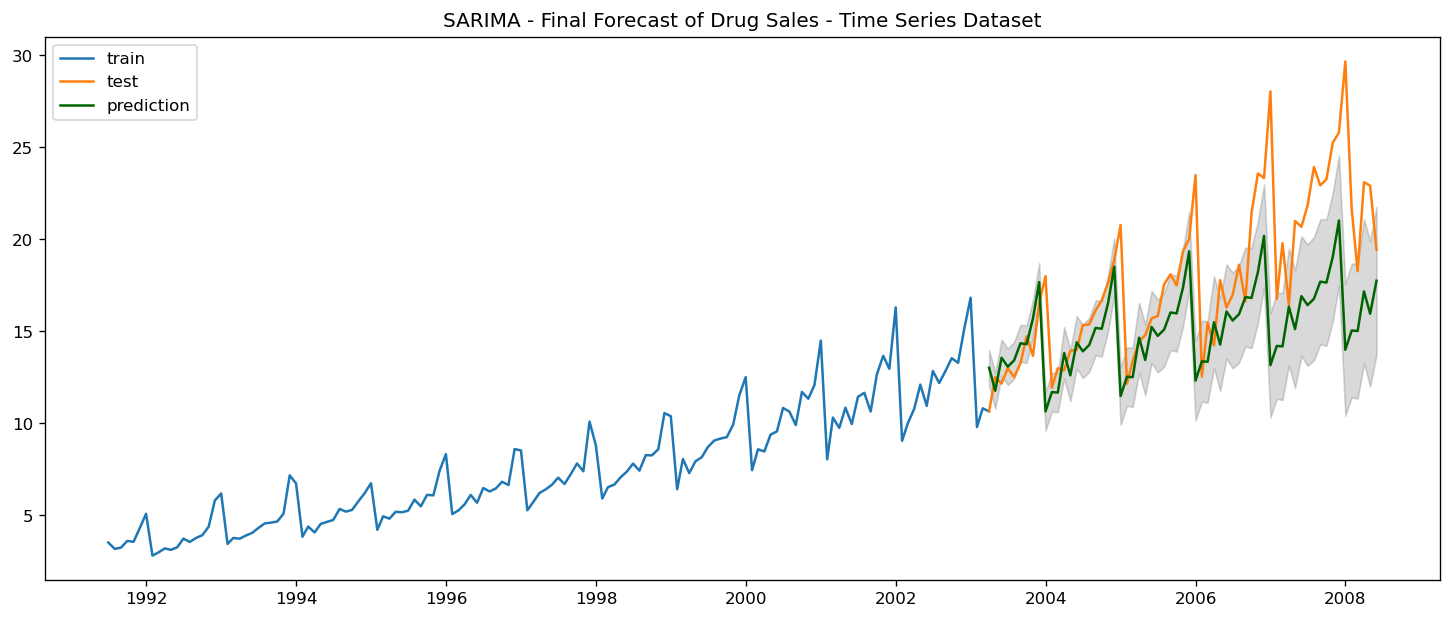

In [28]:
# Forecast
plt.figure(figsize = (15, 6))
n_periods = len(test)
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(test)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.legend(['train', 'test', 'prediction'])
plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [29]:
forecast_accuracy(fitted, test['value'].values)

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15067271032379997,
 'me': -2.6638555102285335,
 'mae': 3.086728438329897,
 'mpe': -0.11780689266956576,
 'rmse': 4.538521164724694,
 'acf1': 0.20432555833725388,
 'corr': 0.5212701942899103,
 'minmax': 0.14898920262901183}

# SARIMAX model with exogeneous variables

- Now, we will force an external predictor, also called, exogenous variable into the model. This model is called the SARIMAX model. The only requirement to use an exogenous variable is we should know the value of the variable during the forecast period as well.

- I want to see how the model looks if we force the recent seasonality pattern into the training and forecast. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

- So, we will always know what values the seasonal index will hold for the future forecasts.

- Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [30]:
# multiplicative seasonal component
result_mul = seasonal_decompose(train['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
train['month'] = train.index.month
df = pd.merge(train, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = train.index  # reassign the index

<ipython-input-30-b08fbb444dd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month


In [31]:
df

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,1.030262
1991-08-01,3.180891,8,1.005180
1991-09-01,3.252221,9,0.964657
1991-10-01,3.611003,10,1.093231
1991-11-01,3.565869,11,1.091378
...,...,...,...
2002-12-01,15.134918,12,1.134228
2003-01-01,16.828350,1,1.338938
2003-02-01,9.800215,2,0.750361


In [32]:
# SARIMAX Model
sxmodel = pm.auto_arima(train[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=200.401, Time=1.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=212.451, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=215.260, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=215.487, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=371.709, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=200.660, Time=0.31 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=201.017, Time=3.07 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=200.903, Time=1.30 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=215.259, Time=0.27 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=198.751, Time=1.41 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=199.692, Time=0.40 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=19

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  142
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                 -92.297
Date:                              Thu, 24 Jun 2021   AIC                            198.594
Time:                                      14:10:52   BIC                            218.666
Sample:                                  07-01-1991   HQIC                           206.750
                                       - 04-01-2003                                         
Covariance Type:                                opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0287      0.029      1.003      0.316      -0.027       0.085
seasonal_index  7.932e-07   2.27e-09    348.884      0.000    7.89e-07    7.98e-07
ar.L1              0.9644      0.034     28.669      0.000       0.899       1.030
ma.L1             -1.0104      0.098    -10.281      0.000      -1.203      -0.818
ma.L2              0.1705      0.092      1.844      0.065      -0.011       0.352
ma.S.L12          -0.1900      0.081     -2.342      0.019      -0.349      -0.031
sigma2             0.2405      0.025      9.721      0.000       0.192       0.289
===================================================================================
Ljung-Box (Q):                       43.44   Jarque-Bera (JB):                 8.07
Prob(Q):                              0.33   Prob(JB):                         0.02
Heteroskedasticity (H):               2.60   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.1e+16. Standard errors may be unstable.
"""

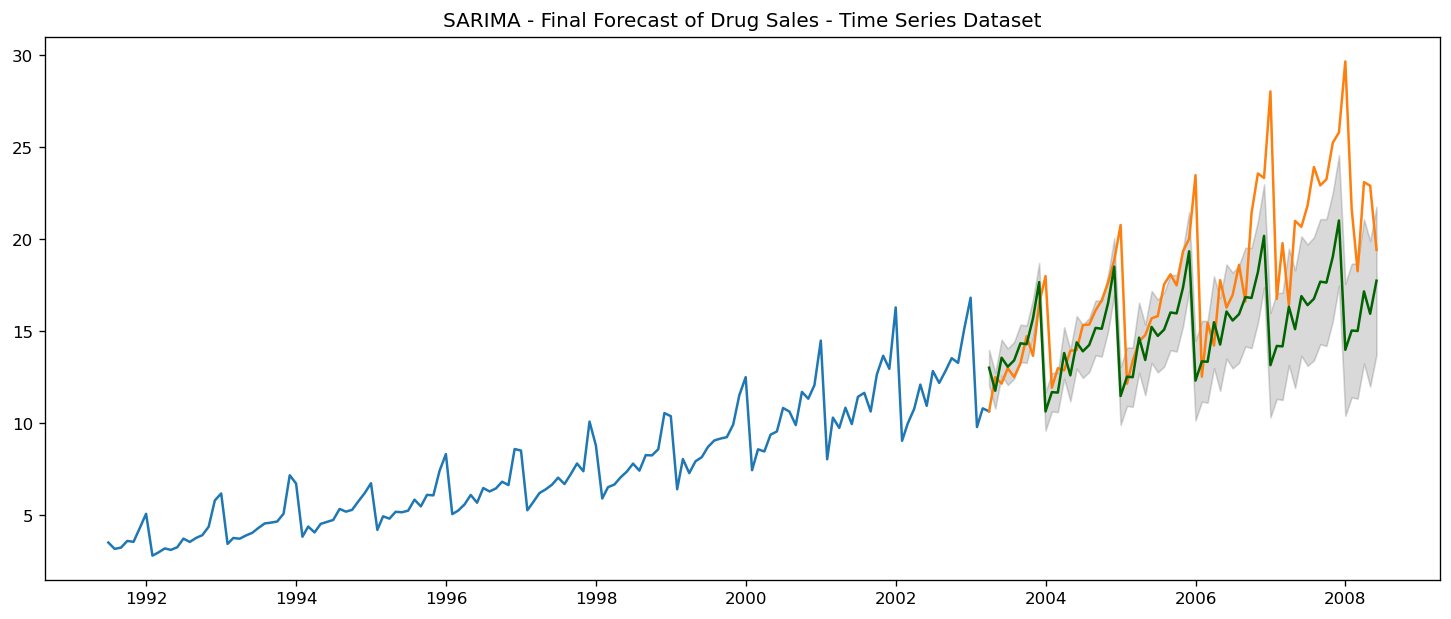

In [33]:
# Forecast
plt.figure(figsize = (15, 6))
n_periods = 63
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['value'])
plt.plot(test)
#plt.plot(df['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

#plt.legend(['train', 'test', 'prediction'])
plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [34]:
forecast_accuracy(fitted, test['value'].values)

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15067271032379997,
 'me': -2.6638555102285335,
 'mae': 3.086728438329897,
 'mpe': -0.11780689266956576,
 'rmse': 4.538521164724694,
 'acf1': 0.20432555833725388,
 'corr': 0.5212701942899103,
 'minmax': 0.14898920262901183}

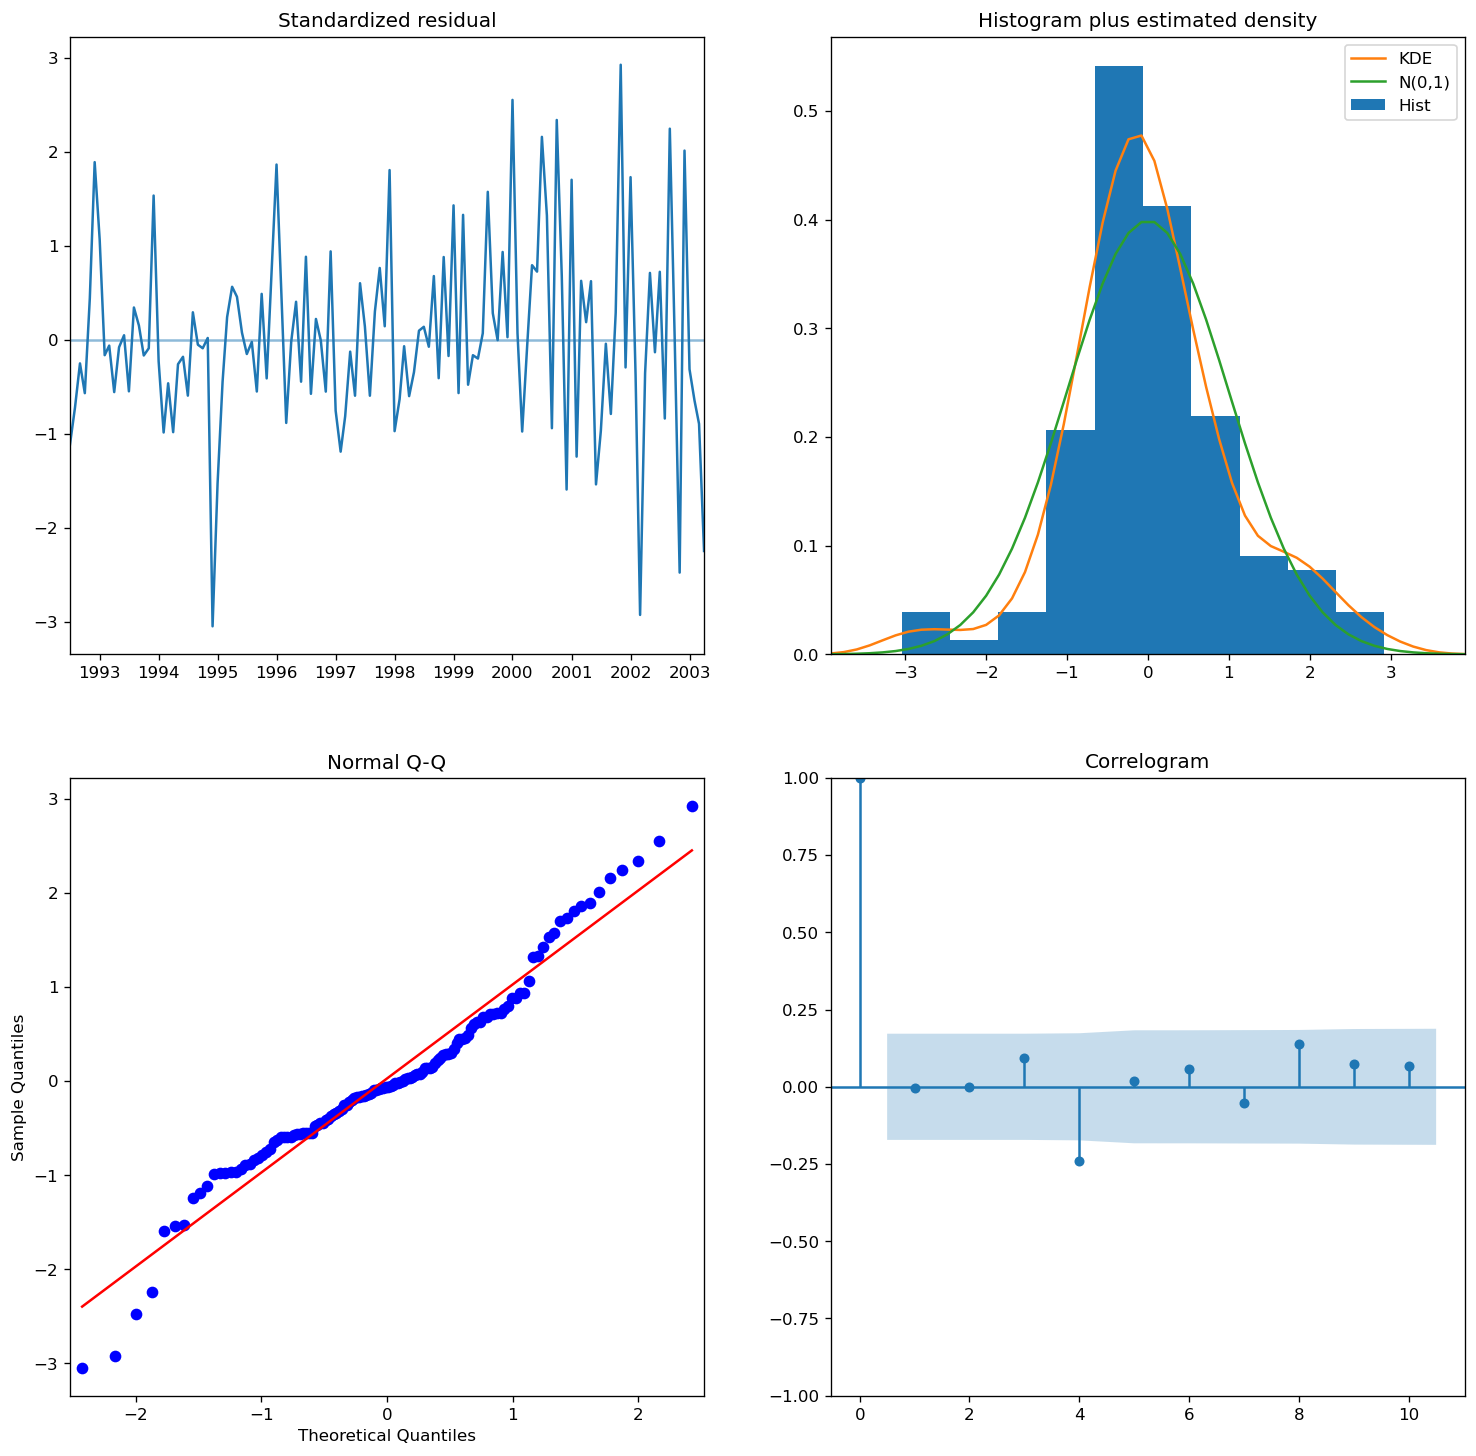

In [37]:
sxmodel.plot_diagnostics(figsize=(15,15))
plt.show()